In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784).astype('float32') / 255.0 
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [4]:
def train_model(hidden_layer=False):
    model = Sequential()

    model.add(Dense(784, activation='relu', input_shape=(784,)))

  
    if hidden_layer:
        model.add(Dense(50, activation='relu'))  

    model.add(Dense(10, activation='softmax'))

  
    model.compile(
        optimizer=Adam(learning_rate=0.05),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    ) 
        # Step 4: Train for 20 epochs
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=1
    )
    
    return history

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8307 - loss: 1.4980 - val_accuracy: 0.9217 - val_loss: 0.2954
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9256 - loss: 0.2874 - val_accuracy: 0.9222 - val_loss: 0.3541
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9302 - loss: 0.2864 - val_accuracy: 0.9320 - val_loss: 0.3107
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9345 - loss: 0.2655 - val_accuracy: 0.9317 - val_loss: 0.3062
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9386 - loss: 0.2524 - val_accuracy: 0.9263 - val_loss: 0.3681
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9355 - loss: 0.2693 - val_accuracy: 0.9359 - val_loss: 0.3260
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9393 - loss: 0.2601 - val_accuracy: 0.9225 - val_loss: 0.3594
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9357 - loss: 0.2595 - val_acc

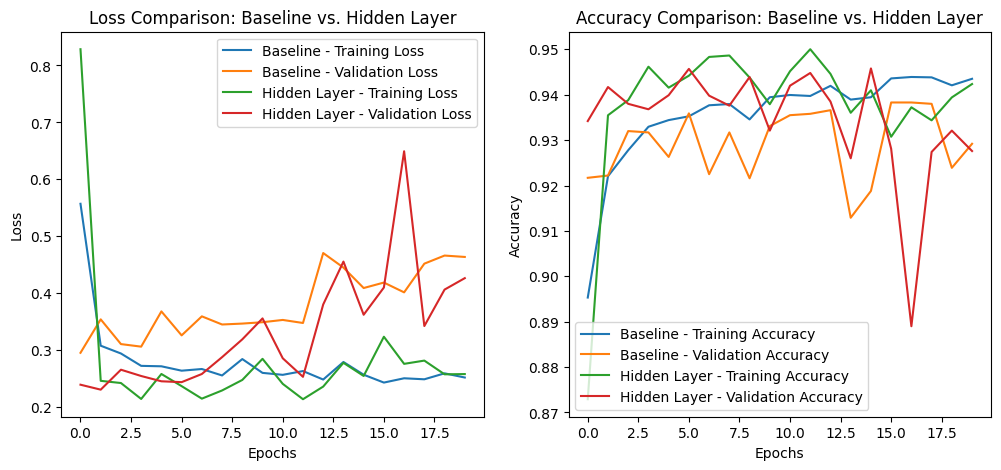

In [5]:
history_baseline = train_model(hidden_layer=False)

history_hidden = train_model(hidden_layer=True)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['loss'], label='Baseline - Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Baseline - Validation Loss')
plt.plot(history_hidden.history['loss'], label='Hidden Layer - Training Loss')
plt.plot(history_hidden.history['val_loss'], label='Hidden Layer - Validation Loss')
plt.title('Loss Comparison: Baseline vs. Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['accuracy'], label='Baseline - Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline - Validation Accuracy')
plt.plot(history_hidden.history['accuracy'], label='Hidden Layer - Training Accuracy')
plt.plot(history_hidden.history['val_accuracy'], label='Hidden Layer - Validation Accuracy')
plt.title('Accuracy Comparison: Baseline vs. Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()